### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [499]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [501]:
data = pd.read_csv('coupons.csv')

In [502]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [505]:
  data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [506]:
 data.duplicated().sum()

74

In [507]:
data = data.drop_duplicates()

In [508]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [510]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [511]:
null_values = data.isnull().sum()
missing_values_percentage = (null_values / len(data) * 100)
print ('\033[1m missing_count\033[0m\n', null_values ) 
print ("\n")
print ('\033[1mmissing_percentage\033[0m\n', missing_values_percentage ) 

 missing_count
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


missing_percentage
 destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000

Since the 'car' column has over 99% null values lets pass this column to concentrate on other columns. Let us fill  any missing values in the 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' columns of the DataFrame `data` with the most frequently occurring value in that column. 

This is a very common technique used in data preprocessing to handle missing data by replacing it with a representative value, in this case, the mode (most frequent value).


In [513]:
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

In [514]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Now you can see that only 'car' has null values

Lets try the Correlation of numeric categorical columns

In [517]:
data_numeric = data.select_dtypes(include=['number'])
data_numeric.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


We can see that column ‘direction_same’ is perfectly correlated with ‘direction_opp’. 

4. What proportion of the total observations chose to accept the coupon?

In [520]:
# To calculate the proportion of observations that accepted the coupon
total_observations = len(data)

accepted_count = data['Y'].value_counts()[1]  
proportion_accepted = (accepted_count / total_observations) * 100  

# Print the result
print(f"Proportion of total observations that accepted the coupon: {proportion_accepted:.2f}%")


Proportion of total observations that accepted the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

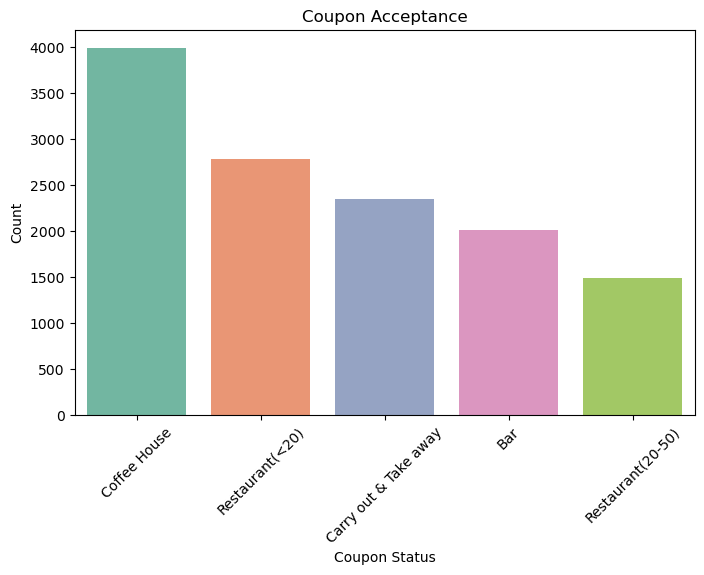

In [522]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(8, 5))
sns.barplot(x=data.coupon.value_counts().index, y=data.coupon.value_counts(), palette='Set2')
plt.title('Coupon Acceptance')
plt.xlabel('Coupon Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

6. Use a histogram to visualize the temperature column.

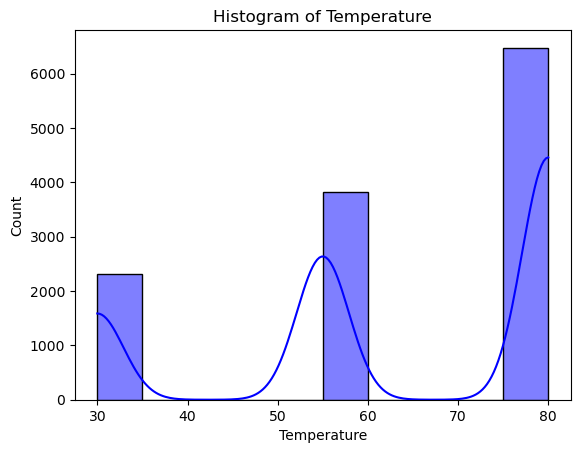

In [524]:
# Create the histogram for the temperature column
sns.histplot(data=data, x='temperature', bins=10, kde=True, color='blue')  

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [526]:
#New dataframe that contains the bar coupon only
data_bar_coupons = data.query("coupon == 'Bar'")
data_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [528]:
# Calculate the total number of bar coupons
total_bar_coupons = len(data_bar_coupons)

# Calculate the number of accepted bar coupons
accepted_bar_coupons = data_bar_coupons['Y'].value_counts()[1]

# Calculate the proportion of accepted bar coupons
proportion_accepted = (accepted_bar_coupons / total_bar_coupons) * 100

print(f"Proportion of bar coupons accepted: {proportion_accepted:.2f}%")


Proportion of bar coupons accepted: 41.00%


In [529]:
# Calculate the number of accepted bar coupons
not_accepted_bar_coupons = data_bar_coupons['Y'].value_counts()[0]

# Calculate the proportion of accepted bar coupons
proportion_NOT_accepted = (not_accepted_bar_coupons / total_bar_coupons) * 100

print(f"Proportion of bar coupons NOT accepted: {proportion_NOT_accepted:.2f}%")

Proportion of bar coupons NOT accepted: 59.00%


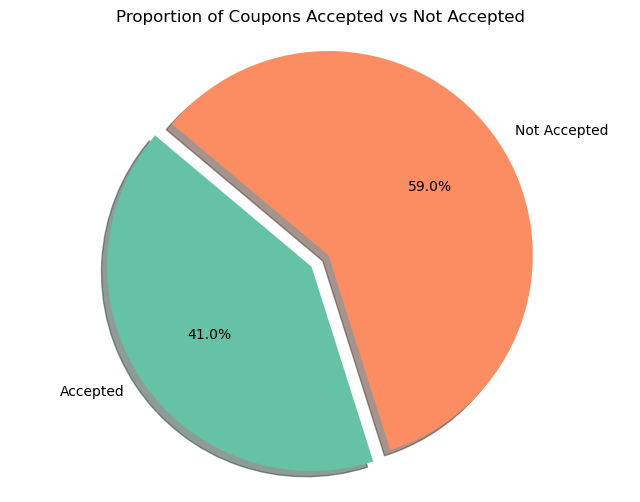

In [530]:
# Data for the pie chart
labels = ['Accepted', 'Not Accepted']
sizes = [proportion_accepted, proportion_NOT_accepted]
colors = ['#66c2a5', '#fc8d62']  # You can choose your own colors
explode = (0.1, 0)  # Explode the first slice (Accepted)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Proportion of Coupons Accepted vs Not Accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [532]:
data_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.05%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


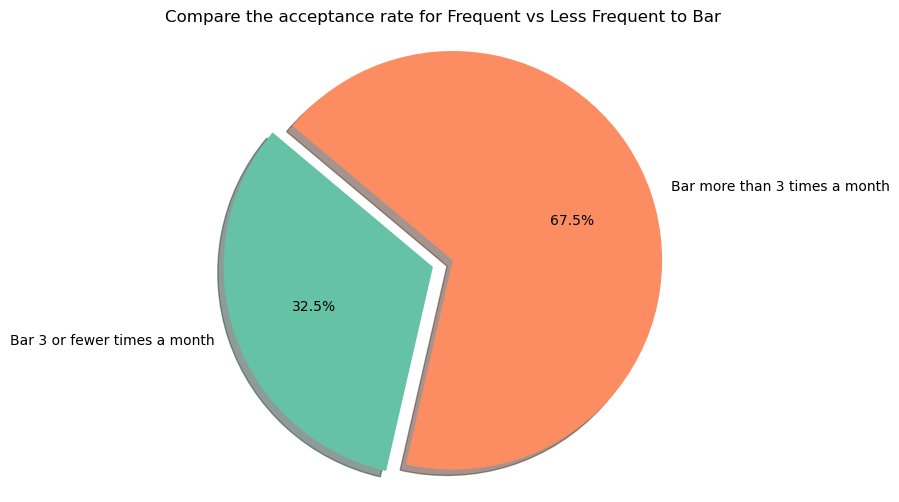

In [533]:
# Let us now create two groups 3 or less and more than 3 times visit to bar based on bar visits
group_3_or_fewer = data_bar_coupons[data_bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]  
group_more_than_3 = data_bar_coupons[data_bar_coupons['Bar'].isin(['4~8', 'gt8'])]  

# Create a function to calculate acceptance rates
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group['Y'].value_counts()[1]
    if total_coupons > 0:  # Check to avoid division by zero
        return round((accepted_coupons / total_coupons) * 100, 2)
    else:
        return 0  # Return 0 if there are no coupons in the group

# Calculate acceptance rates for each group
acceptance_rate_3_or_fewer = calculate_acceptance_rate(group_3_or_fewer)
acceptance_rate_more_than_3 = calculate_acceptance_rate(group_more_than_3)

# Print 
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_3_or_fewer:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")

# Data for the pie chart
labels = ['Bar 3 or fewer times a month', 'Bar more than 3 times a month']
sizes = [acceptance_rate_3_or_fewer, acceptance_rate_more_than_3]
colors = ['#66c2a5', '#fc8d62']  # You can choose your own colors
explode = (0.1, 0)  # Explode the first slice (Accepted)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Compare the acceptance rate for Frequent vs Less Frequent to Bar')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [535]:
data_bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [536]:
data_bar_coupons_new = data_bar_coupons

In [537]:
import warnings
warnings.simplefilter(action='ignore')

# Replace '50plus' with the 51 to fix age data for ease of analysis
data_bar_coupons_new['age'] = data_bar_coupons_new['age'].replace('50plus', '51')

# Replace 'below21' with 20 to fix age data for ease of analysis
data_bar_coupons_new['age'] = data_bar_coupons_new['age'].replace('below21', '20')

# Convert the 'age' column to integers
data_bar_coupons_new['age'] = data_bar_coupons_new['age'].astype(int)  # Convert to int

# Create a group for drivers who go to a bar more than once a month and are over 25
group_drivers_over_25 = data_bar_coupons_new[(data_bar_coupons_new['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupons_new['age'] > 25)]

# Create a group for all other drivers
group_others = data_bar_coupons_new[~((data_bar_coupons_new['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupons_new['age'] > 25))]  

# Calculate acceptance rates for both groups
acceptance_rate_drivers_over_25 = calculate_acceptance_rate(group_drivers_over_25)
acceptance_rate_others = calculate_acceptance_rate(group_others)

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month and age over 25: {acceptance_rate_drivers_over_25:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others:.2f}%")

# Compare the acceptance rates
if acceptance_rate_drivers_over_25 > acceptance_rate_others:
    print("Drivers over 25 who go to a bar more than once a month have a higher acceptance rate.")
elif acceptance_rate_drivers_over_25 < acceptance_rate_others:
    print("All other drivers have a higher acceptance rate.")
else:
    print("The acceptance rates are the same for both groups.")

Acceptance rate for drivers who go to a bar more than once a month and age over 25: 69.52%
Acceptance rate for all other drivers: 33.46%
Drivers over 25 who go to a bar more than once a month have a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [539]:
data_bar_coupons_new['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [540]:
data_bar_coupons_new['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [541]:
# Create a group for drivers who go to a bar more than once a month and have passengers that are not kids
# and have occupations other than 'Farming Fishing & Forestry'
group_drivers_valid = data_bar_coupons_new[
    (data_bar_coupons_new['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~data_bar_coupons_new['passanger'].isin(['Kid(s)'])) &  
    (~data_bar_coupons_new['occupation'].isin(['Farming Fishing & Forestry']))  # Exclude specific occupation
]

# Create a group for all other drivers
group_others_valid = data_bar_coupons_new[
    ~((data_bar_coupons_new['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
      (data_bar_coupons_new['passanger'].isin(['Kid(s)'])) & 
      (~data_bar_coupons_new['occupation'].isin(['Farming Fishing & Forestry'])))
]

# Calculate acceptance rates for both groups
acceptance_rate_drivers_valid = calculate_acceptance_rate(group_drivers_valid)
acceptance_rate_others_valid = calculate_acceptance_rate(group_others_valid)

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month with valid passengers: {acceptance_rate_drivers_valid:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others_valid:.2f}%")

# Compare the acceptance rates
if acceptance_rate_drivers_valid > acceptance_rate_others_valid:
    print("Drivers with valid passengers who go to a bar more than once a month have a higher acceptance rate.")
elif acceptance_rate_drivers_valid < acceptance_rate_others_valid:
    print("All other drivers have a higher acceptance rate.")
else:
    print("The acceptance rates are the same for both groups.")

Acceptance rate for drivers who go to a bar more than once a month with valid passengers: 71.32%
Acceptance rate for all other drivers: 41.07%
Drivers with valid passengers who go to a bar more than once a month have a higher acceptance rate.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [543]:
data_bar_coupons_new['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [544]:
data_bar_coupons_new['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [545]:
data_bar_coupons_new['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

Acceptance rate for drivers who go to bars more than once a month, have valid passangers, and are not widowed: 71.32%
Acceptance rate for drivers who go to bars more than once a month and are under 30: 72.17%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K: 45.76%
Group 2 has the highest acceptance rate.


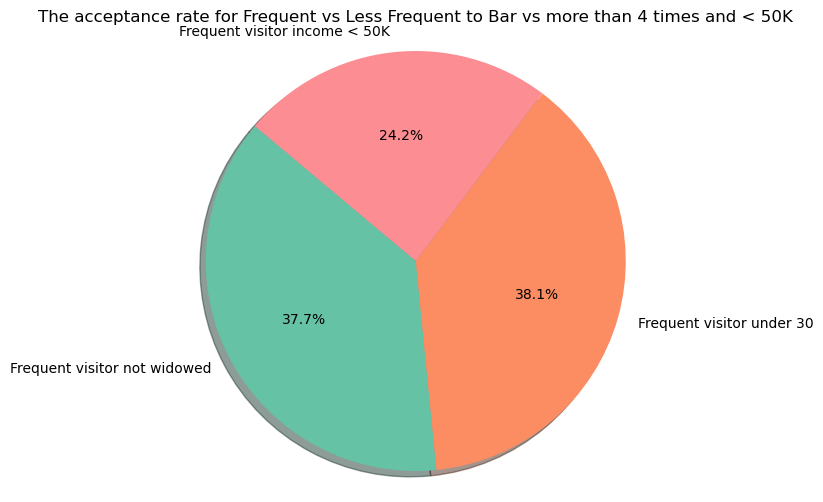

In [546]:
# Create a group for drivers who go to bars more than once a month, have passengers that are not kids, and are not widowed
group_drivers_valid_1 = data_bar_coupons_new[
    (data_bar_coupons_new['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~data_bar_coupons_new['passanger'].isin(['Kid(s)'])) &  
    (data_bar_coupons_new['maritalStatus'] != 'Widowed')  
]
# Create a group for drivers who go to bars more than once a month and are under the age of 30
group_drivers_valid_2 = data_bar_coupons_new[
    (data_bar_coupons_new['Bar'].isin(['1~3','4~8', 'gt8'])) & 
    (data_bar_coupons_new['age'] < 30) 
]

# Create a group for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K
group_drivers_valid_3 = data_bar_coupons_new[
    (data_bar_coupons_new['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (data_bar_coupons_new['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499'])) 
]

# Calculate acceptance rates for all three groups
acceptance_rate_group_1 = calculate_acceptance_rate(group_drivers_valid_1)
acceptance_rate_group_2 = calculate_acceptance_rate(group_drivers_valid_2)
acceptance_rate_group_3 = calculate_acceptance_rate(group_drivers_valid_3)

# Print the results
print(f"Acceptance rate for drivers who go to bars more than once a month, have valid passangers, and are not widowed: {acceptance_rate_group_1:.2f}%")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under 30: {acceptance_rate_group_2:.2f}%")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K: {acceptance_rate_group_3:.2f}%")

# Compare the acceptance rates
if acceptance_rate_group_1 > acceptance_rate_group_2 and acceptance_rate_group_1 > acceptance_rate_group_3:
    print("Group 1 has the highest acceptance rate.")
elif acceptance_rate_group_2 > acceptance_rate_group_1 and acceptance_rate_group_2 > acceptance_rate_group_3:
    print("Group 2 has the highest acceptance rate.")
elif acceptance_rate_group_3 > acceptance_rate_group_1 and acceptance_rate_group_3 > acceptance_rate_group_2:
    print("Group 3 has the highest acceptance rate.")
else:
    print("There is no clear highest acceptance rate among the groups.")

# Data for the pie chart
labels = ['Frequent visitor not widowed', 'Frequent visitor under 30', 'Frequent visitor income < 50K']
sizes = [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]
colors = ['#66c2a5', '#fc8d62', '#fc8d92']  
explode = (0, 0, 0)  

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('The acceptance rate for Frequent vs Less Frequent to Bar vs more than 4 times and < 50K')
plt.show()

# Lets create separate df for comparing bar goers group vs CoffeeHouse goers group
acceptance_rate_group_1_bar = acceptance_rate_group_1
acceptance_rate_group_2_bar = acceptance_rate_group_2
acceptance_rate_group_3_bar = acceptance_rate_group_3


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Key Findings

1.	Social Dynamics: Individuals who frequent to bar may exhibit a greater inclination for accepting promotional offers, suggesting a correlation between social behavior and coupon acceptance.
2.	Generational Preferences: Younger demographics may demonstrate a higher likelihood of engaging with novel experiences, including the utilization of promotional coupons, potentially indicating a generational trend in consumer behavior.
3.	Economic Considerations: Individuals who frequent to budget-friendly establishments and possess lower income levels may be more inclined to accept promotional offers as a means of cost-saving, suggesting a strong economic influence on coupon acceptance.
4.	Group Dynamics: Disparities in coupon acceptance rates among different demographic groups may highlight specific characteristics that foster a more receptive environment for promotional offers, suggesting the potential for targeted marketing strategies.


Next Steps and Recommendations

These hypotheses provide a framework for further exploration of the factors influencing coupon acceptance, potentially leading to more effective marketing campaigns tailored to specific demographic segments. More in-depth analysis of different groups and various modeling techniques may provide clear patterns to tailor the coupons and market them more effectively 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the CoffeeHouse Coupons**

Now, we will lead you through an exploration of just the CoffeeHouse related coupons.

1. Create a new DataFrame that contains just the CoffeeHouse coupons.

In [551]:
#New dataframe that contains the CoffeeHouse coupon only
data_CoffeeHouse_coupons = data.query("coupon == 'Coffee House'")
data_CoffeeHouse_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


2. What proportion of CoffeeHouse coupons were accepted?

In [553]:
# Calculate the total number of bar coupons
total_CoffeeHouse_coupons = len(data_CoffeeHouse_coupons)

# Calculate the number of accepted bar coupons
accepted_CoffeeHouse_coupons = data_CoffeeHouse_coupons['Y'].value_counts()[1]

# Calculate the proportion of accepted bar coupons
proportion_accepted_CoffeeHouse = (accepted_CoffeeHouse_coupons / total_CoffeeHouse_coupons) * 100

print(f"Proportion of CoffeeHouse coupons accepted: {proportion_accepted_CoffeeHouse:.2f}%")


Proportion of CoffeeHouse coupons accepted: 49.86%


In [554]:
# Calculate the number of accepted bar coupons
not_accepted_CoffeeHouse_coupons = data_CoffeeHouse_coupons['Y'].value_counts()[0]

# Calculate the proportion of accepted bar coupons
proportion_NOT_accepted_CoffeeHouse = (not_accepted_CoffeeHouse_coupons / total_CoffeeHouse_coupons) * 100

print(f"Proportion of CoffeeHouse coupons NOT accepted: {proportion_NOT_accepted_CoffeeHouse:.2f}%")

Proportion of CoffeeHouse coupons NOT accepted: 50.14%


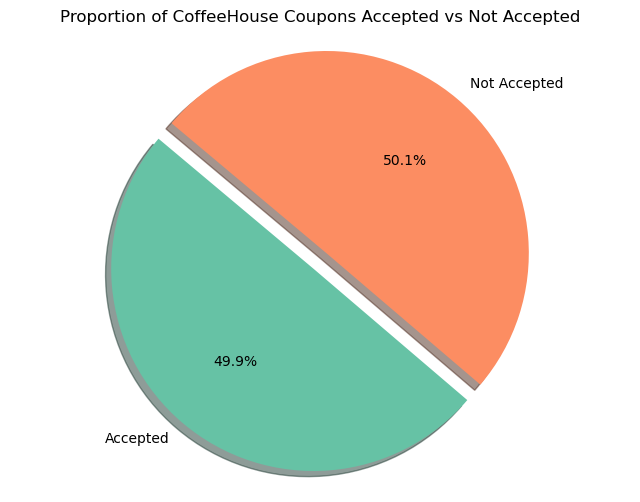

In [555]:
# Data for the pie chart
labels = ['Accepted', 'Not Accepted']
sizes = [proportion_accepted_CoffeeHouse, proportion_NOT_accepted_CoffeeHouse]
colors = ['#66c2a5', '#fc8d62']  # You can choose your own colors
explode = (0.1, 0)  # Explode the first slice (Accepted)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Proportion of CoffeeHouse Coupons Accepted vs Not Accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [557]:
data_CoffeeHouse_coupons['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8'], dtype=object)

Acceptance rate for those who went to a CoffeeHouse 3 or fewer times a month: 44.87%
Acceptance rate for those who went to a CoffeeHouse more than 3 times a month: 67.50%


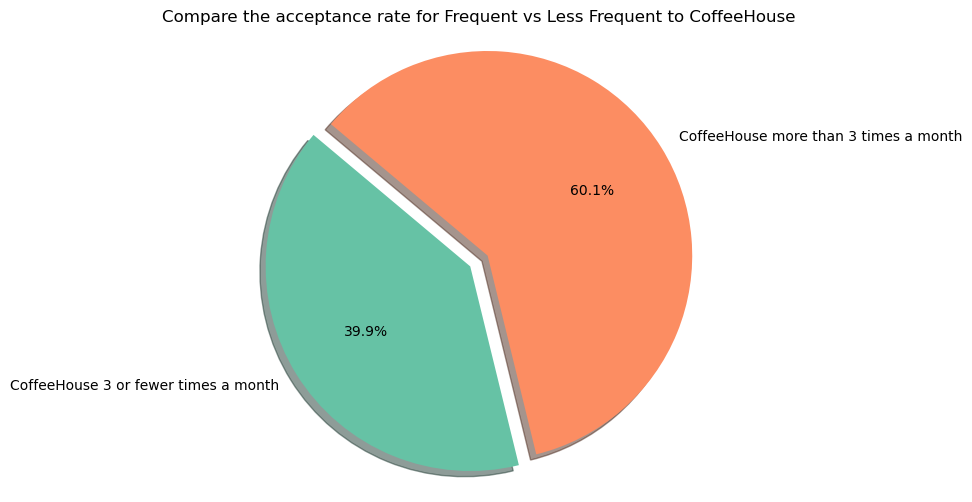

In [558]:
# Let us now create two groups 3 or less and more than 3 times visit to CoffeeHouse based on CoffeeHouse visits
group_3_or_fewer = data_CoffeeHouse_coupons[data_CoffeeHouse_coupons['CoffeeHouse'].isin(['never', 'less1', '1~3'])]  
group_more_than_3 = data_CoffeeHouse_coupons[data_CoffeeHouse_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]  

# Create a function to calculate acceptance rates
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group['Y'].value_counts()[1]
    if total_coupons > 0:  # Check to avoid division by zero
        return round((accepted_coupons / total_coupons) * 100, 2)
    else:
        return 0  # Return 0 if there are no coupons in the group

# Calculate acceptance rates for each group
acceptance_rate_3_or_fewer = calculate_acceptance_rate(group_3_or_fewer)
acceptance_rate_more_than_3 = calculate_acceptance_rate(group_more_than_3)

# Print 
print(f"Acceptance rate for those who went to a CoffeeHouse 3 or fewer times a month: {acceptance_rate_3_or_fewer:.2f}%")
print(f"Acceptance rate for those who went to a CoffeeHouse more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")

# Data for the pie chart
labels = ['CoffeeHouse 3 or fewer times a month', 'CoffeeHouse more than 3 times a month']
sizes = [acceptance_rate_3_or_fewer, acceptance_rate_more_than_3]
colors = ['#66c2a5', '#fc8d62']  # You can choose your own colors
explode = (0.1, 0)  # Explode the first slice (Accepted)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Compare the acceptance rate for Frequent vs Less Frequent to CoffeeHouse')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [560]:
data_CoffeeHouse_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [561]:
data_CoffeeHouse_coupons_new = data_CoffeeHouse_coupons

In [562]:
import warnings
warnings.simplefilter(action='ignore')

# Replace '50plus' with the 51 to fix age data for ease of analysis
data_CoffeeHouse_coupons_new['age'] = data_CoffeeHouse_coupons_new['age'].replace('50plus', '51')

# Replace 'below21' with 20 to fix age data for ease of analysis
data_CoffeeHouse_coupons_new['age'] = data_CoffeeHouse_coupons_new['age'].replace('below21', '20')

# Convert the 'age' column to integers
data_CoffeeHouse_coupons_new['age'] = data_CoffeeHouse_coupons_new['age'].astype(int)  # Convert to int

# Create a group for drivers who go to a CoffeeHouse more than once a month and are over 25
group_drivers_over_25 = data_CoffeeHouse_coupons_new[(data_CoffeeHouse_coupons_new['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & (data_CoffeeHouse_coupons_new['age'] > 25)]

# Create a group for all other drivers
group_others = data_CoffeeHouse_coupons_new[~((data_CoffeeHouse_coupons_new['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & (data_CoffeeHouse_coupons_new['age'] > 25))]  

# Calculate acceptance rates for both groups
acceptance_rate_drivers_over_25 = calculate_acceptance_rate(group_drivers_over_25)
acceptance_rate_others = calculate_acceptance_rate(group_others)

# Print the results
print(f"Acceptance rate for drivers who go to a CoffeeHouse more than once a month and age over 25: {acceptance_rate_drivers_over_25:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others:.2f}%")

# Compare the acceptance rates
if acceptance_rate_drivers_over_25 > acceptance_rate_others:
    print("Drivers over 25 who go to a CoffeeHouse more than once a month have a higher acceptance rate.")
elif acceptance_rate_drivers_over_25 < acceptance_rate_others:
    print("All other drivers have a higher acceptance rate.")
else:
    print("The acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to a CoffeeHouse more than once a month and age over 25: 63.81%
Acceptance rate for all other drivers: 42.69%
Drivers over 25 who go to a CoffeeHouse more than once a month have a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [564]:
data_CoffeeHouse_coupons_new['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [565]:
data_CoffeeHouse_coupons_new['passanger'].unique()

array(['Friend(s)', 'Kid(s)', 'Alone', 'Partner'], dtype=object)

In [566]:
# Create a group for drivers who go to a CoffeeHouse more than once a month and have passengers that are not kids
# and have occupations other than 'Farming Fishing & Forestry'
group_drivers_valid = data_CoffeeHouse_coupons_new[
    (data_CoffeeHouse_coupons_new['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & 
    (~data_CoffeeHouse_coupons_new['passanger'].isin(['Kid(s)'])) &  
    (~data_CoffeeHouse_coupons_new['occupation'].isin(['Farming Fishing & Forestry']))  # Exclude specific occupation
]

# Create a group for all other drivers
group_others_valid = data_CoffeeHouse_coupons_new[
    ~((data_CoffeeHouse_coupons_new['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & 
      (data_CoffeeHouse_coupons_new['passanger'].isin(['Kid(s)'])) & 
      (~data_CoffeeHouse_coupons_new['occupation'].isin(['Farming Fishing & Forestry'])))
]

# Calculate acceptance rates for both groups
acceptance_rate_drivers_valid = calculate_acceptance_rate(group_drivers_valid)
acceptance_rate_others_valid = calculate_acceptance_rate(group_others_valid)

# Print the results
print(f"Acceptance rate for drivers who go to a CoffeeHouse more than once a month with valid passengers: {acceptance_rate_drivers_valid:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others_valid:.2f}%")

# Compare the acceptance rates
if acceptance_rate_drivers_valid > acceptance_rate_others_valid:
    print("Drivers with valid passengers who go to a CoffeeHouse more than once a month have a higher acceptance rate.")
elif acceptance_rate_drivers_valid < acceptance_rate_others_valid:
    print("All other drivers have a higher acceptance rate.")
else:
    print("The acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to a CoffeeHouse more than once a month with valid passengers: 66.08%
Acceptance rate for all other drivers: 49.45%
Drivers with valid passengers who go to a CoffeeHouse more than once a month have a higher acceptance rate.


6. Compare the acceptance rates between those drivers who:
go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [568]:
data_CoffeeHouse_coupons_new['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [569]:
data_CoffeeHouse_coupons_new['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [570]:
data_CoffeeHouse_coupons_new['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

Acceptance rate for drivers who go to CoffeeHouses more than once a month, have valid passangers, and are not widowed: 66.08%
Acceptance rate for drivers who go to CoffeeHouses more than once a month and are under 30: 68.93%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K: 53.76%
Group 2 has the highest acceptance rate.


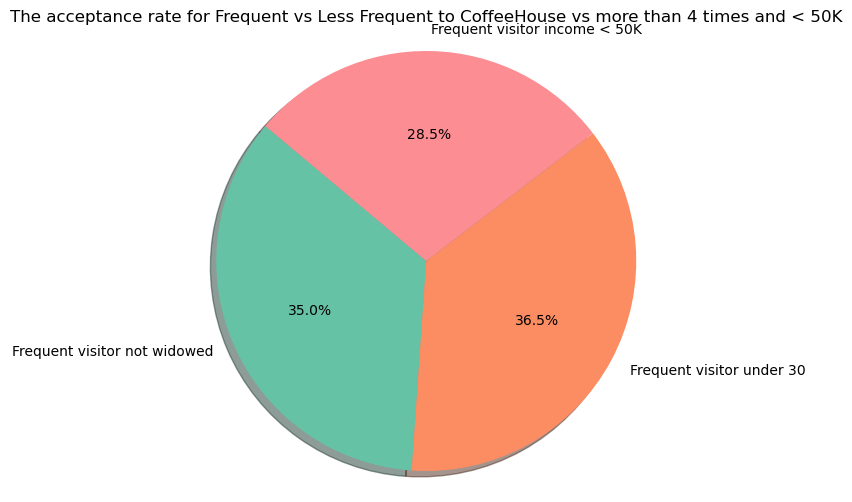

In [571]:
# Create a group for drivers who go to CoffeeHouses more than once a month, have passengers that are not kids, and are not widowed
group_drivers_valid_1 = data_CoffeeHouse_coupons_new[
    (data_CoffeeHouse_coupons_new['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & 
    (~data_CoffeeHouse_coupons_new['passanger'].isin(['Kid(s)'])) &  
    (data_CoffeeHouse_coupons_new['maritalStatus'] != 'Widowed')  
]
# Create a group for drivers who go to CoffeeHouses more than once a month and are under the age of 30
group_drivers_valid_2 = data_CoffeeHouse_coupons_new[
    (data_CoffeeHouse_coupons_new['CoffeeHouse'].isin(['1~3','4~8', 'gt8'])) & 
    (data_CoffeeHouse_coupons_new['age'] < 30) 
]

# Create a group for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K
group_drivers_valid_3 = data_CoffeeHouse_coupons_new[
    (data_CoffeeHouse_coupons_new['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  
    (data_CoffeeHouse_coupons_new['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499'])) 
]

# Calculate acceptance rates for all three groups
acceptance_rate_group_1 = calculate_acceptance_rate(group_drivers_valid_1)
acceptance_rate_group_2 = calculate_acceptance_rate(group_drivers_valid_2)
acceptance_rate_group_3 = calculate_acceptance_rate(group_drivers_valid_3)

# Print the results
print(f"Acceptance rate for drivers who go to CoffeeHouses more than once a month, have valid passangers, and are not widowed: {acceptance_rate_group_1:.2f}%")
print(f"Acceptance rate for drivers who go to CoffeeHouses more than once a month and are under 30: {acceptance_rate_group_2:.2f}%")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K: {acceptance_rate_group_3:.2f}%")

# Compare the acceptance rates
if acceptance_rate_group_1 > acceptance_rate_group_2 and acceptance_rate_group_1 > acceptance_rate_group_3:
    print("Group 1 has the highest acceptance rate.")
elif acceptance_rate_group_2 > acceptance_rate_group_1 and acceptance_rate_group_2 > acceptance_rate_group_3:
    print("Group 2 has the highest acceptance rate.")
elif acceptance_rate_group_3 > acceptance_rate_group_1 and acceptance_rate_group_3 > acceptance_rate_group_2:
    print("Group 3 has the highest acceptance rate.")
else:
    print("There is no clear highest acceptance rate among the groups.")

# Data for the pie chart
labels = ['Frequent visitor not widowed', 'Frequent visitor under 30', 'Frequent visitor income < 50K']
sizes = [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]
colors = ['#66c2a5', '#fc8d62', '#fc8d92']  
explode = (0, 0, 0)  

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('The acceptance rate for Frequent vs Less Frequent to CoffeeHouse vs more than 4 times and < 50K')
plt.show()

# Lets create separate df for comparing bar goers group vs CoffeeHouse goers group
acceptance_rate_group_1_CoffeeHouse = acceptance_rate_group_1
acceptance_rate_group_2_CoffeeHouse = acceptance_rate_group_2
acceptance_rate_group_3_CoffeeHouse = acceptance_rate_group_3


7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

***Key Findings***

1.	Social Dynamics: Individuals who frequent to CoffeeHouse may exhibit a greater inclination for accepting promotional offers, suggesting a correlation between social behavior and coupon acceptance.
2.	Generational Preferences: Younger demographics may demonstrate a higher likelihood of engaging with novel experiences, including the utilization of promotional coupons, potentially indicating a generational trend in consumer behavior.
3.	Economic Considerations: Individuals who frequent to budget-friendly establishments and possess lower income levels may be more inclined to accept promotional offers as a means of cost-saving, suggesting a strong economic influence on coupon acceptance.
4.	Group Dynamics: Disparities in coupon acceptance rates among different demographic groups may highlight specific characteristics that foster a more receptive environment for promotional offers, suggesting the potential for targeted marketing strategies.


**Next Steps and Recommendations**

These hypotheses provide a framework for further exploration of the factors influencing coupon acceptance, potentially leading to more effective marketing campaigns tailored to specific demographic segments. More in-depth analysis of different groups and various modeling techniques may provide clear patterns to tailor the coupons and market them more effectively 

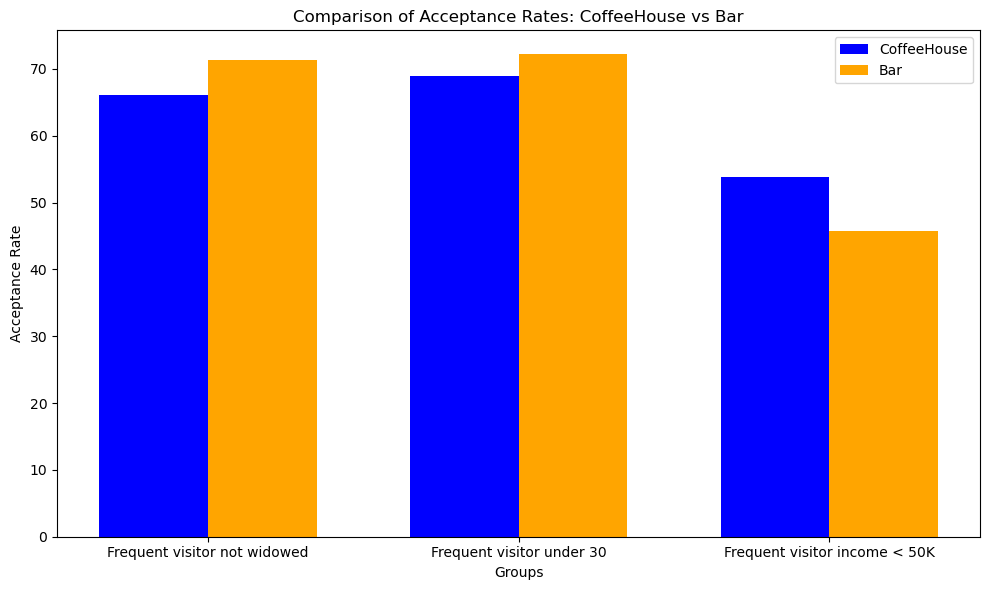

In [636]:
# Compare the CoffeeHouse Vs Bar Coupons

# Create a list of acceptance rates for each group
coffeehouse_goers = [
    acceptance_rate_group_1_CoffeeHouse,
    acceptance_rate_group_2_CoffeeHouse,
    acceptance_rate_group_3_CoffeeHouse
]

bar_goers = [
    acceptance_rate_group_1_bar,
    acceptance_rate_group_2_bar,
    acceptance_rate_group_3_bar
]

# Set the positions and width for the bars
bar_width = 0.35
x = np.arange(len(coffeehouse_goers))  # the label locations

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, coffeehouse_goers, width=bar_width, label='CoffeeHouse', color='blue')
plt.bar(x + bar_width/2, bar_goers, width=bar_width, label='Bar', color='orange')

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Acceptance Rates: CoffeeHouse vs Bar')
plt.xticks(x, ['Frequent visitor not widowed', 'Frequent visitor under 30', 'Frequent visitor income < 50K'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Key Findings**

When compared the Acceptance rates
- "Frequent visitors not widowed" group's Bar accpetance is more than CoffeeHouse accpetance
- "Frequent visitors under 30" group's Bar accpetance is more than CoffeeHouse accpetance
- "Frequent visitors income under 50K" group's Bar accpetance is less than CoffeeHouse accpetance